<a href="https://colab.research.google.com/github/Hubertmeteor/sales-prediction-and-analysis/blob/main/sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# # Assuming you have two CSV files named 'stores_data_set.csv' and 'features_data_set.csv'
# stores_data = pd.read_csv('/content/stores_data_set.csv')
# features_data = pd.read_csv('/content/Features_data_set.csv')
# sales_data = pd.read_csv('/content/sales_data_set.csv')


In [ ]:
# # # Merge data
# merged_data = pd.merge(features_data, stores_data, on='Store')
# merged_data = pd.merge(merged_data, sales_data, on=['Store', 'Date'])


In [ ]:
# merged_data.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Type,Size,Dept,Weekly_Sales,IsHoliday_y
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50,False
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27,False
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12,False
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04,False
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38,False
5,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,6,5749.03,False
6,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,7,21084.08,False
7,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,8,40129.01,False
8,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,9,16930.99,False
9,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,10,30721.50,False


In [ ]:
# # Assuming your four MarkDown columns are named 'MarkDown1', 'MarkDown2', 'MarkDown3', and 'MarkDown4'

# merged_data['MarkDown1'].fillna(0, inplace=True)
# merged_data['MarkDown2'].fillna(0, inplace=True)
# merged_data['MarkDown3'].fillna(0, inplace=True)
# merged_data['MarkDown4'].fillna(0, inplace=True)
# merged_data['MarkDown5'].fillna(0, inplace=True)

In [ ]:
# merged_data['Type'] = merged_data['Type'].map({'A':0, 'B':1, 'C':2})


In [ ]:
# # Assuming 'merged_data' is your DataFrame
# merged_data['IsHoliday_x'] = merged_data['IsHoliday_x'].astype(int)
# merged_data['IsHoliday_y'] = merged_data['IsHoliday_y'].astype(int)

In [ ]:
# # Assuming you have a DataFrame named 'sales_data' with 'Date', 'Weekly_Sales', and 'Unemployment' columns
# # Convert 'Date' to datetime type if it's not already
# merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# # Replace missing values in 'Unemployment' with 0
# merged_data['Unemployment'].fillna(0, inplace=True)

<ipython-input-8-14729a59f15e>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_data['Date'] = pd.to_datetime(merged_data['Date'])


In [ ]:
merged_data = pd.read_csv('/content/merged_data.csv')

In [ ]:
# Check for missing values in each column
missing_values = merged_data.isnull().sum()

# Display columns with missing values and their counts
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])


Columns with Missing Values:
Series([], dtype: int64)


In [ ]:
# Check for NaN values in each column
nan_values = merged_data.isnull().sum()

# Display columns with NaN values
columns_with_nan = nan_values[nan_values > 0].index

print("Columns with NaN values:")
print(columns_with_nan)


Columns with NaN values:
Index([], dtype='object')


In [ ]:
merged_data.head(8)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Type,Size,Dept,Weekly_Sales,IsHoliday_y,Year,Month,Year_Month
0,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,151315,1,24924.50,0,2010,5,2010_5
1,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,151315,2,50605.27,0,2010,5,2010_5
2,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,151315,3,13740.12,0,2010,5,2010_5
3,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,151315,4,39954.04,0,2010,5,2010_5
4,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,151315,5,32229.38,0,2010,5,2010_5
5,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,151315,6,5749.03,0,2010,5,2010_5
6,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,151315,7,21084.08,0,2010,5,2010_5
7,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,151315,8,40129.01,0,2010,5,2010_5


In [ ]:
# Check if there are any missing values in the entire DataFrame
missing_values = merged_data.isnull().sum()
any_missing = merged_data.isnull().any().any()

if any_missing:
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.


In [ ]:
# # Extract year and month separately
# merged_data['Year'] = pd.to_datetime(merged_data['Date']).dt.year
# merged_data['Month'] = pd.to_datetime(merged_data['Date']).dt.month

# # Create a new column combining year and month (as strings)
# merged_data['Year_Month'] = merged_data['Year'].astype(str) + '_' + merged_data['Month'].astype(str)

In [ ]:
# # Assuming you have a DataFrame named 'your_dataframe'
# merged_data.to_csv('merged_data.csv', index=False)

# # Download the CSV file
# from google.colab import files
# files.download('merged_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-59-c5b4c3987477>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


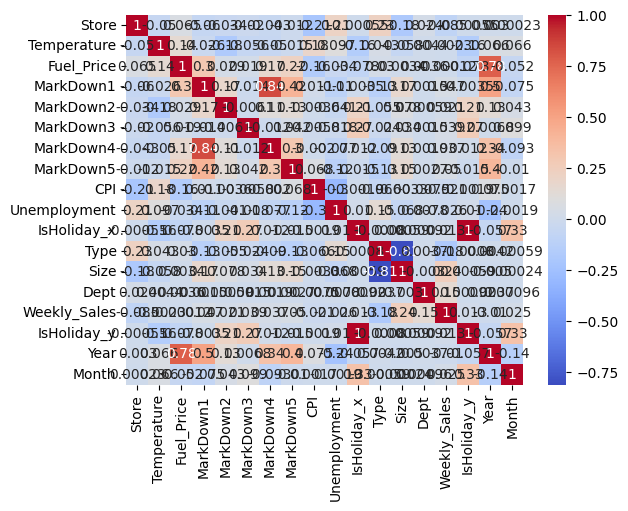

In [ ]:
# Exploratory Data Analysis (EDA)
# Explore and visualize the data to gain insights

# Correlation analysis
correlation_matrix = merged_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


This line displays the heatmap.
The resulting heatmap provides a visual representation of how each variable in the dataset correlates with every other variable. The color intensity and the annotation values give insights into the strength and direction of the correlations. This analysis is useful for identifying potential relationships between variables and understanding the multicollinearity between features in the dataset.

Here's a quick interpretation guide for the heatmap:

Dark blue (cool colors): Strong negative correlation.

Dark red (warm colors): Strong positive correlation.

Lighter colors: Weaker correlation or no correlation (closer to zero).

It helps in feature selection, identifying redundant features, and gaining insights into the relationships within the dataset, which can be crucial for feature engineering and improving the performance of machine learning models.

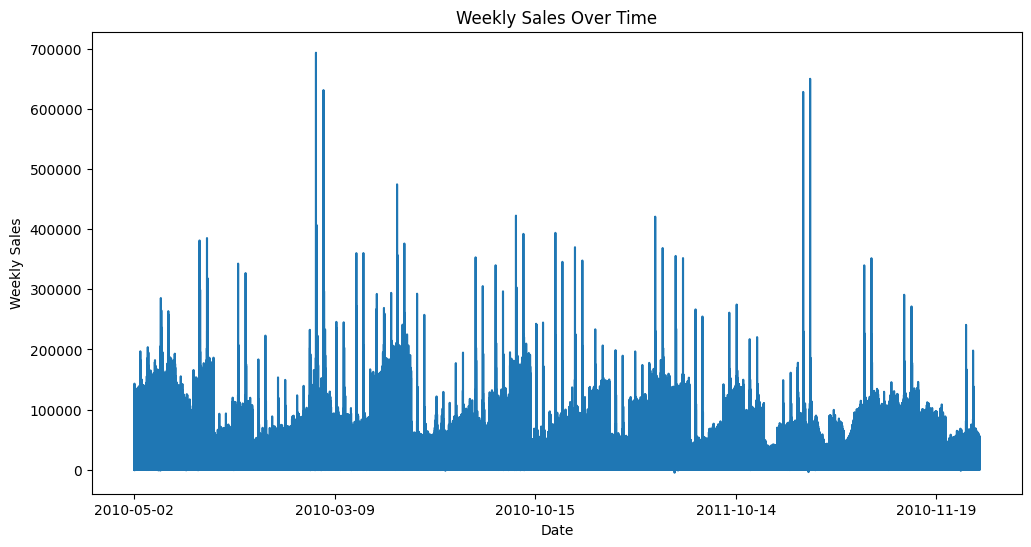

In [ ]:
# Time-series analysis
time_series_data = merged_data.set_index('Date')['Weekly_Sales']
time_series_data.plot(figsize=(12, 6))
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

This plot visually represents the variation in weekly sales over the period covered by the dataset. Time-series analysis is crucial for understanding patterns, trends, and seasonality in the data. This plot allows you to observe any noticeable trends, cycles, or irregularities in the weekly sales data over time. It can also help identify potential seasonality, patterns related to specific times of the year, or other temporal dependencies that may influence sales.

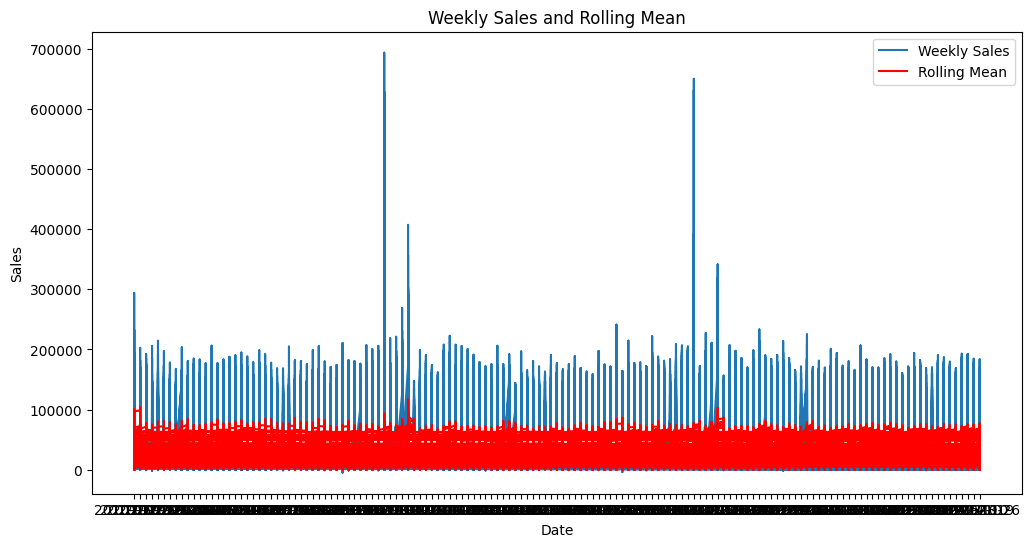

In [ ]:
rolling_mean = time_series_data.rolling(window=12).mean()  # Adjust the window size
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Weekly Sales')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.title('Weekly Sales and Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

This plot shows the original weekly sales data and the rolling mean. The rolling mean helps in highlighting the underlying trends and patterns in the time series by smoothing out short-term fluctuations. Analysts often use rolling mean plots to identify long-term trends and make the time series data more interpretable. Adjusting the window size (in this case, 12) allows you to control the level of smoothing applied to the data.

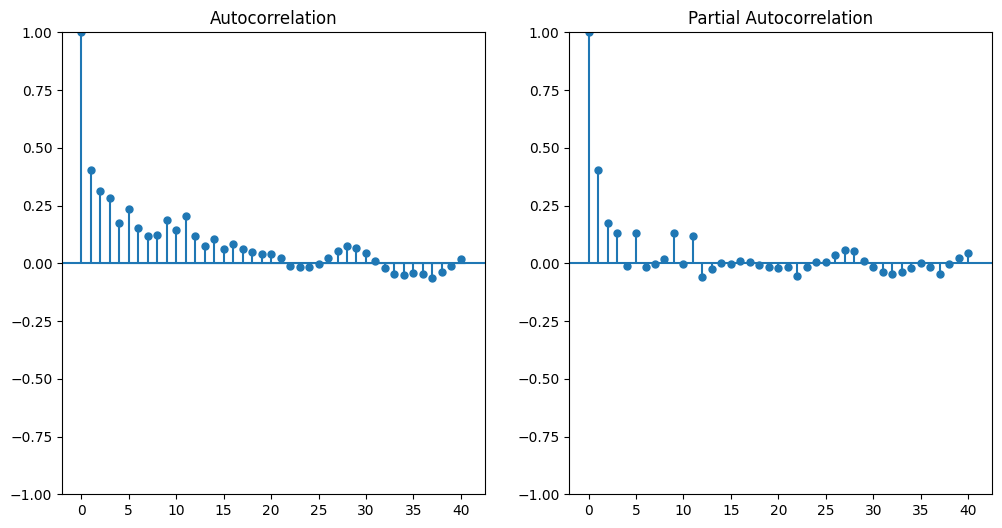

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(time_series_data, lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(time_series_data, lags=40, ax=plt.gca())
plt.show()


This code is utilizing the statsmodels library to create autocorrelation and partial autocorrelation plots for a given time series data (time_series_data). These plots are commonly used in time series analysis to understand the temporal dependencies and correlations within the data.

Here's a brief explanation of the purpose of each plot:

**Autocorrelation Plot (ACF):**
The left subplot (plot_acf) displays the autocorrelation function (ACF) of the time series data.
Autocorrelation measures the correlation between a time series and a lagged version of itself.
The x-axis represents the number of lags, and the y-axis represents the autocorrelation values.
Peaks in the ACF plot indicate potential seasonality or repeating patterns at certain lags.

**Partial Autocorrelation Plot (PACF):**

The right subplot (plot_pacf) displays the partial autocorrelation function (PACF) of the time series data.
Partial autocorrelation measures the correlation between a time series and a lagged version of itself while removing the effect of intervening lags.
Similar to ACF, the x-axis represents the number of lags, and the y-axis represents the partial autocorrelation values.
Peaks in the PACF plot can help identify the order of an autoregressive (AR) model.

These plots are valuable in identifying potential patterns, seasonality, and the appropriate lag order for time series modeling. Peaks extending beyond the shaded region in the plots might be statistically significant. Analysts often use these plots to inform decisions about the order of autoregressive and moving average components when fitting time series models like ARIMA (AutoRegressive Integrated Moving Average).







In [ ]:
# Machine Learning Model (Random Forest as an example)
X = merged_data.drop(['Weekly_Sales', 'Date'], axis=1)
y = merged_data['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)






RandomForestRegressor(random_state=42)

this model prepares the data, splits it into training and testing sets, initializes a Random Forest Regressor, and trains the model on the training set. After running this model, the model is ready to be evaluated, and predictions can be made on new data.






In [ ]:
merged_data.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Type,Size,Dept,Weekly_Sales,IsHoliday_y,Year,Month,Year_Month
0,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,151315,1,24924.50,0,2010,5,2010_5
1,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,151315,2,50605.27,0,2010,5,2010_5
2,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,151315,3,13740.12,0,2010,5,2010_5
3,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,151315,4,39954.04,0,2010,5,2010_5
4,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,151315,5,32229.38,0,2010,5,2010_5


Mean Absolute Error (MAE): 1779.9812235880165
Mean Squared Error (MSE): 23402561.22883875
Root Mean Squared Error (RMSE): 4837.619376184814
R-squared (R2): 0.955485173831585


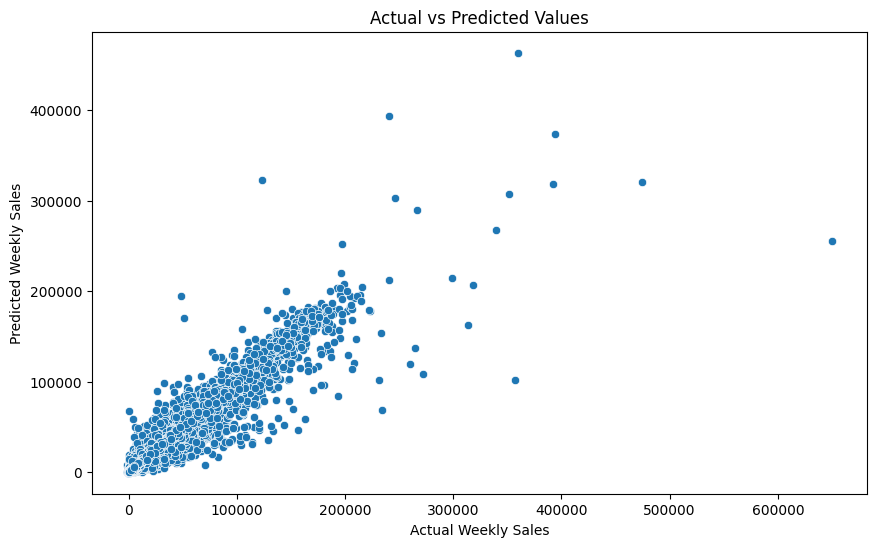

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.show()


In summary, the model appears to perform well on the test set, as indicated by low MAE, MSE, and RMSE values, and a high R-squared value. However, it's essential to consider the context of the specific problem and domain to determine whether these performance metrics meet the desired criteria for the application. Additionally, it might be valuable to compare these metrics with the baseline or evaluate the model on different datasets for a more comprehensive assessment.

**Mean Absolute Error (MAE):**

Definition: MAE measures the average absolute difference between the predicted and actual values.
Interpretation: A lower MAE indicates better model performance. It is easy to understand as it represents the average absolute error.

**Mean Squared Error (MSE):**

MSE measures the average squared difference between the predicted and actual values.
Interpretation: MSE gives higher penalties to larger errors compared to MAE. It is useful for understanding the spread of errors but is sensitive to outliers.

**Root Mean Squared Error (RMSE):**

RMSE is the square root of the MSE. It has the same unit as the target variable.
Interpretation: Like MSE, RMSE provides a measure of the spread of errors. It is more interpretable than MSE since it is in the same units as the target variable.

**R-squared (R2):**

R-squared is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
Interpretation: R2 ranges from 0 to 1, with 1 indicating a perfect fit. It helps understand the goodness of fit of the model. A higher R2 suggests that a larger proportion of the variance in the target variable is explained by the model.

In summary, while MAE, MSE, and RMSE focus on the accuracy and spread of errors, R-squared provides a measure of how well the model explains the variance in the target variable. When evaluating a regression model like a Random Forest regressor, it's common to consider a combination of these metrics to get a comprehensive understanding of its performance.

In [ ]:
# Generate predictions
# #predictions = model.predict(X_test)

# # Calculate R-squared (coefficient of determination) as a measure of accuracy
# r_squared = model.score(X_test, y_test)
# print(f'R-squared on Test Set: {r_squared}')

# # Visualize the predictions with explicit color setting
# plt.figure(figsize=(12, 6))
# plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
# plt.title('Actual vs Predicted Sales on Test Set')
# plt.xlabel('Actual Sales')
# plt.ylabel('Predicted Sales')
# plt.show()

R-squared on Test Set: 0.955485173831585


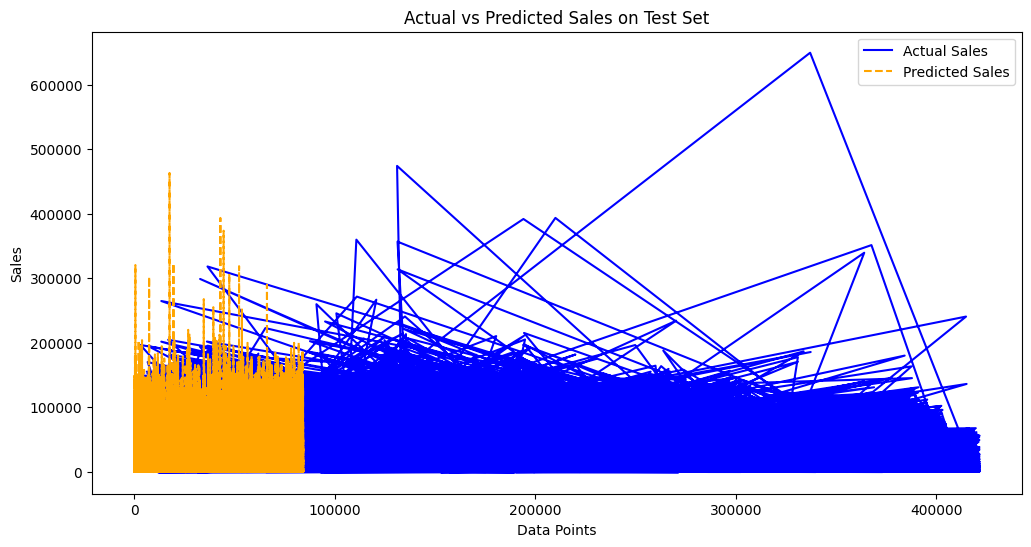

In [ ]:
# Calculate R-squared (coefficient of determination) as a measure of accuracy
r_squared = model.score(X_test, y_test)
print(f'R-squared on Test Set: {r_squared}')

# Visualize the predictions and actual sales on the same plot
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Sales', color='blue')
plt.plot(y_pred, label='Predicted Sales', color='orange', linestyle='dashed')
plt.title('Actual vs Predicted Sales on Test Set')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.legend()
plt.show()


The resulting plot provides a visual comparison between the actual and predicted sales values, making it easier to understand how well the model is capturing the underlying patterns in the data.

R-squared on Test Set: 0.955485173831585


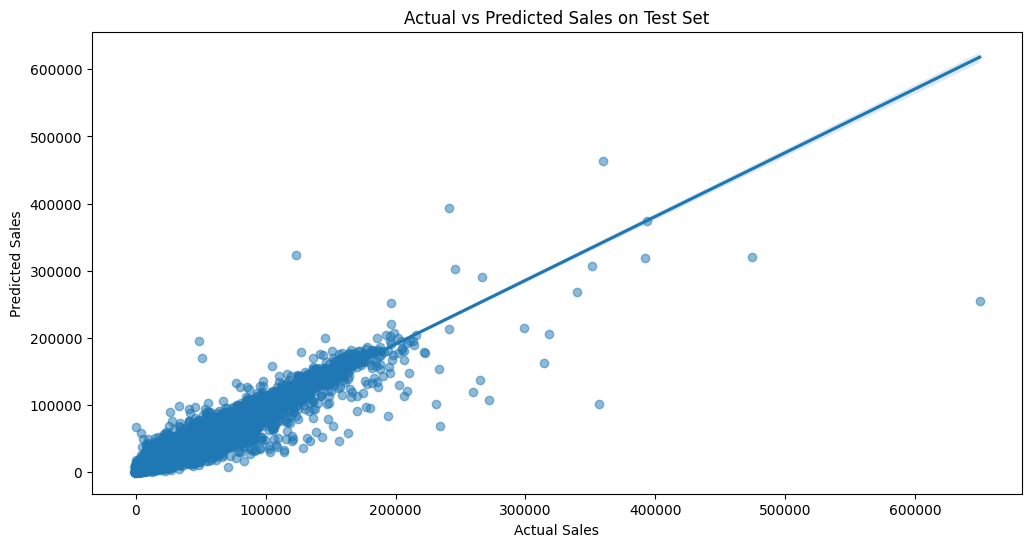

In [ ]:
import seaborn as sns

# Calculate R-squared (coefficient of determination) as a measure of accuracy
r_squared = model.score(X_test, y_test)
print(f'R-squared on Test Set: {r_squared}')

# Create a DataFrame for easier plotting
plot_data = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})

# Visualize the scatter plot with regression line
plt.figure(figsize=(12, 6))
sns.regplot(x='Actual Sales', y='Predicted Sales', data=plot_data, scatter_kws={'alpha':0.5})
plt.title('Actual vs Predicted Sales on Test Set')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

The resulting scatter plot with a regression line allows for a more detailed examination of the relationship between actual and predicted sales. Each point represents an observation from the test set, and the regression line indicates the overall trend or fit of the model. The transparency of the points (alpha) helps in visualizing regions with a higher density of data points.






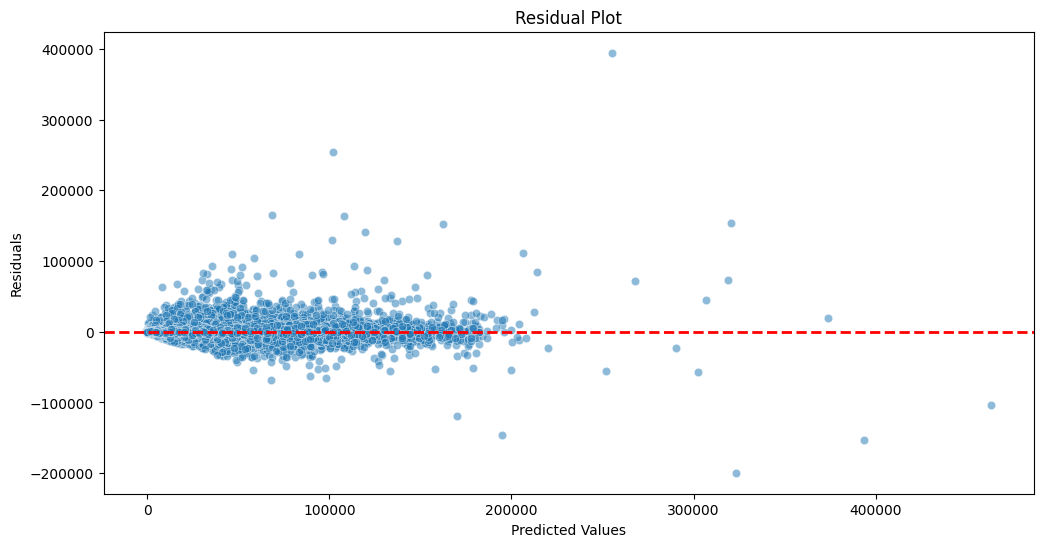

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0 for reference
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In a good model, residuals should be randomly scattered around the reference line, indicating that the model captures the underlying patterns in the data. Systematic patterns or trends in the residuals may suggest that the model has room for improvement or that certain features are not adequately captured.

In [ ]:

# Feature Importance
feature_importance = model.feature_importances_
features = X.columns

# Get top 5 features
top_features = pd.Series(feature_importance, index=features).sort_values(ascending=False).head(5)

# Print top features and their importance
print("Top Features:")
print(top_features)

Top Features:
Dept           0.625527
Size           0.188040
Store          0.056103
CPI            0.029309
Temperature    0.016776
dtype: float64


The output indicates the top 5 features and their associated importance scores, ranked from the most to the least important. In this specific example:

Dept has the highest importance score (0.625527).
Size, Store, CPI, and Temperature follow in decreasing order of importance.
These scores provide insights into which features have the most impact on the model's predictions. High importance scores suggest that these features play a significant role in determining weekly sales according to the Random Forest model. This information can be useful for feature selection, interpretation, and understanding the driving factors behind the model's predictions.

In [ ]:
# Check for missing values in X
# missing_values = X.isnull().sum()
# print("Missing Values:\n", missing_values)

# # Check data types of columns in X
# print("\nData Types:\n", X.dtypes)

# # Encode categorical variables if needed
# # Assuming 'Type' is a categorical variable
# X_encoded = pd.get_dummies(X, columns=['Type'])

# # # Train the model with the encoded data
# # X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
# # model = RandomForestRegressor(n_estimators=100, random_state=42)
# # model.fit(X_train, y_train)

# # Print feature names and their importances
# feature_names_encoded = X_encoded.columns
# feature_importance_encoded = model.feature_importances_

# for feature, importance in zip(feature_names_encoded, feature_importance_encoded):
#     print(f'{feature}: {importance}')

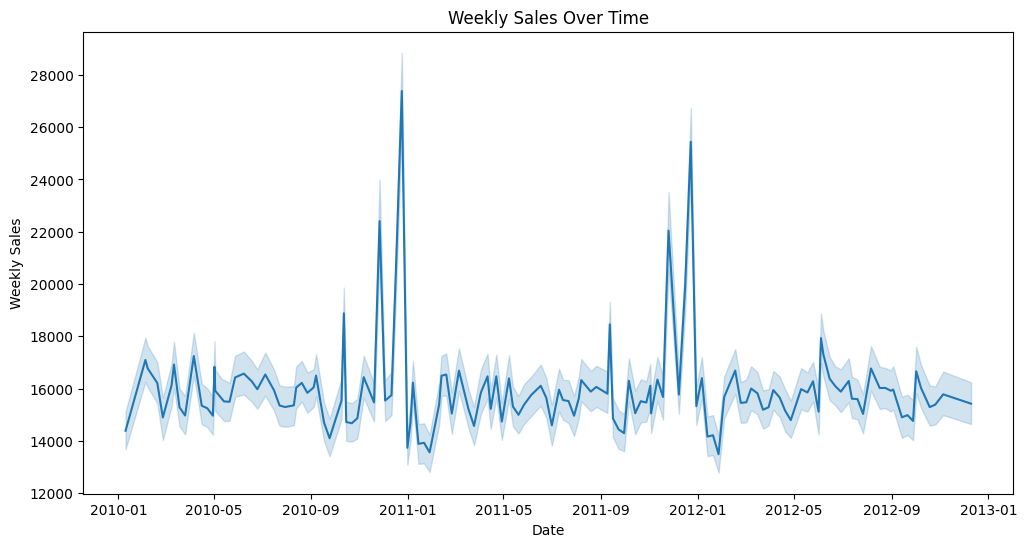

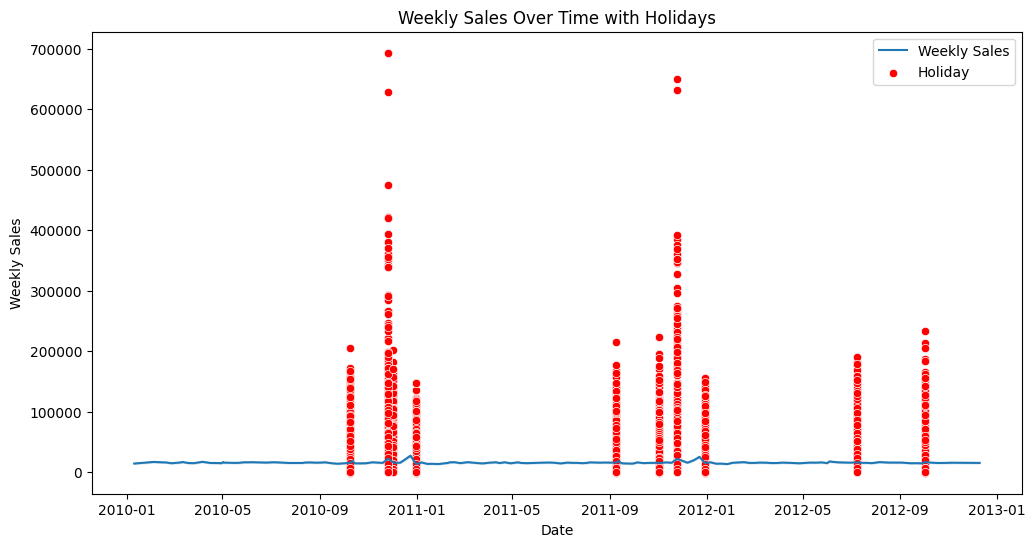

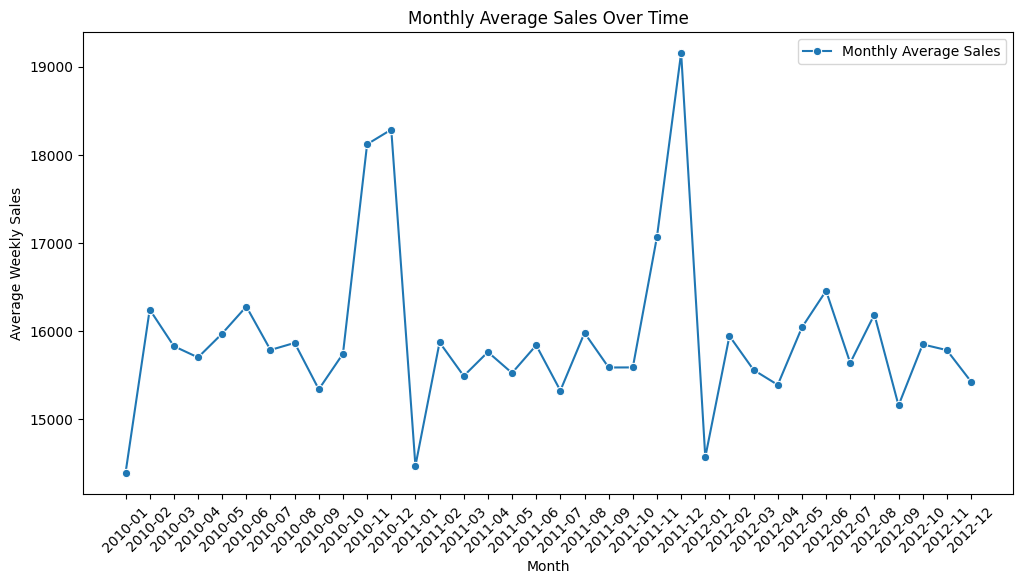

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'merged_data' with 'Date' and 'Weekly_Sales' columns
# Convert 'Date' to datetime type if it's not already
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Plot Weekly Sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=merged_data)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

# Identify holidays and mark them on the plot
holidays = merged_data[merged_data['IsHoliday_x'] == 1]
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=merged_data, label='Weekly Sales')
sns.scatterplot(x='Date', y='Weekly_Sales', data=holidays, color='red', label='Holiday')
plt.title('Weekly Sales Over Time with Holidays')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

# Analyze seasonal patterns (e.g., monthly averages)
monthly_avg_sales = merged_data.groupby(merged_data['Date'].dt.to_period("M"))['Weekly_Sales'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_avg_sales.index.astype(str), y=monthly_avg_sales.values, label='Monthly Average Sales', marker='o')
plt.title('Monthly Average Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)
plt.show()


# Explore Markdown Effectiveness
# Example: Analyze the impact of Markdown promotions on Weekly Sales


In [ ]:
# Extract relevant columns
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Calculate correlation coefficients
correlation_results = merged_data[['Weekly_Sales'] + markdown_columns].corr()['Weekly_Sales']

# Print the correlation coefficients
print("Correlation between Weekly Sales and Markdown columns:")
print(correlation_results)


Correlation between Weekly Sales and Markdown columns:
Weekly_Sales    1.000000
MarkDown1       0.047172
MarkDown2       0.020716
MarkDown3       0.038562
MarkDown4       0.037467
MarkDown5       0.050465
Name: Weekly_Sales, dtype: float64


Weekly Sales vs. MarkDown1:

The correlation coefficient is approximately 0.0472.
This positive correlation suggests a very weak positive relationship between 'Weekly_Sales' and 'MarkDown1'. As 'MarkDown1' values increase, there is a very slight tendency for 'Weekly_Sales' to also increase.
Weekly Sales vs. MarkDown2:

The correlation coefficient is approximately 0.0207.
This positive correlation suggests a very weak positive relationship between 'Weekly_Sales' and 'MarkDown2'. As 'MarkDown2' values increase, there is a very slight tendency for 'Weekly_Sales' to also increase.
Weekly Sales vs. MarkDown3:

The correlation coefficient is approximately 0.0386.
This positive correlation suggests a very weak positive relationship between 'Weekly_Sales' and 'MarkDown3'. As 'MarkDown3' values increase, there is a very slight tendency for 'Weekly_Sales' to also increase.
Weekly Sales vs. MarkDown4:

The correlation coefficient is approximately 0.0375.
This positive correlation suggests a very weak positive relationship between 'Weekly_Sales' and 'MarkDown4'. As 'MarkDown4' values increase, there is a very slight tendency for 'Weekly_Sales' to also increase.
Weekly Sales vs. MarkDown5:

The correlation coefficient is approximately 0.0505.
This positive correlation suggests a very weak positive relationship between 'Weekly_Sales' and 'MarkDown5'. As 'MarkDown5' values increase, there is a very slight tendency for 'Weekly_Sales' to also increase.
In summary, all the correlation coefficients are close to zero, indicating very weak positive relationships between 'Weekly_Sales' and the 'Markdown' columns. While statistically significant due to the large dataset, the practical significance of these relationships is minimal. It's important to note that correlation does not imply causation, and other factors may influence the observed associations.

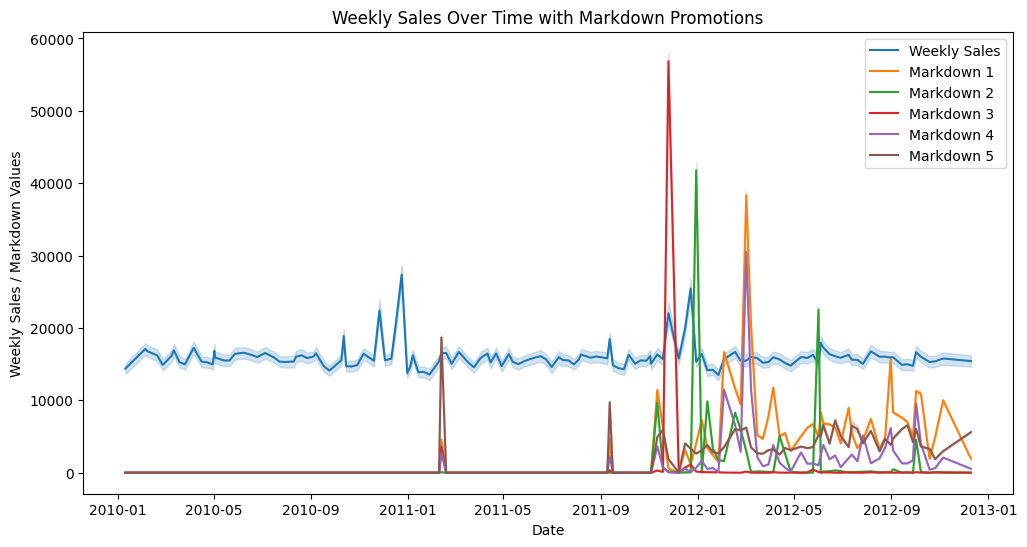

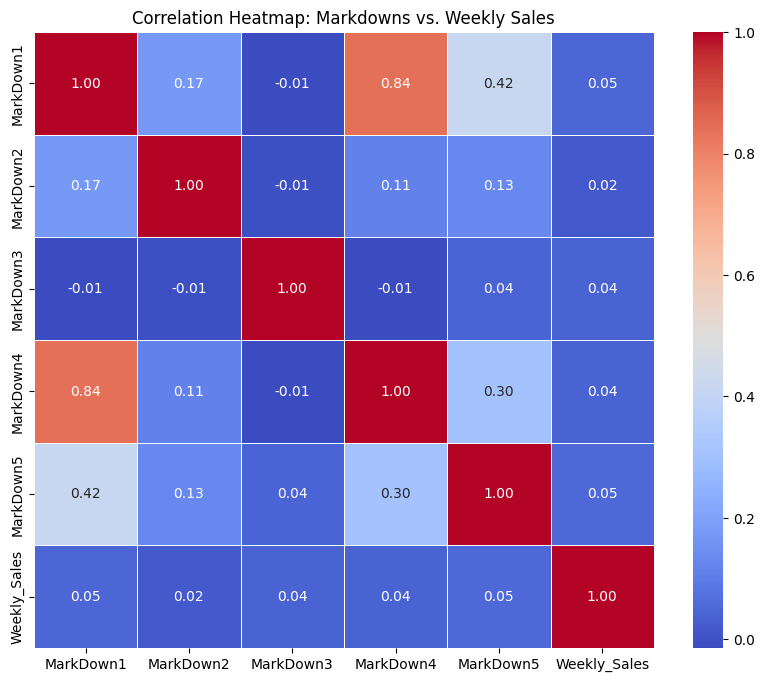

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'merged_data' with 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', and 'Weekly_Sales' columns
# Convert 'Date' to datetime type if it's not already
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Plot Weekly Sales over time with Markdown promotions
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=merged_data, label='Weekly Sales')
sns.lineplot(x='Date', y='MarkDown1', data=merged_data, label='Markdown 1')
sns.lineplot(x='Date', y='MarkDown2', data=merged_data, label='Markdown 2')
sns.lineplot(x='Date', y='MarkDown3', data=merged_data, label='Markdown 3')
sns.lineplot(x='Date', y='MarkDown4', data=merged_data, label='Markdown 4')
sns.lineplot(x='Date', y='MarkDown5', data=merged_data, label='Markdown 5')
plt.title('Weekly Sales Over Time with Markdown Promotions')
plt.xlabel('Date')
plt.ylabel('Weekly Sales / Markdown Values')
plt.legend()
plt.show()

# Analyze correlation between Markdowns and Weekly Sales
markdown_corr = merged_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Weekly_Sales']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(markdown_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: Markdowns vs. Weekly Sales')
plt.show()


# Explore Store-Level Analysis
# Example: Identify top-performing stores and analyze their characteristics

<ipython-input-73-81c9527aa814>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stores.index, y=top_stores.values, palette='viridis')


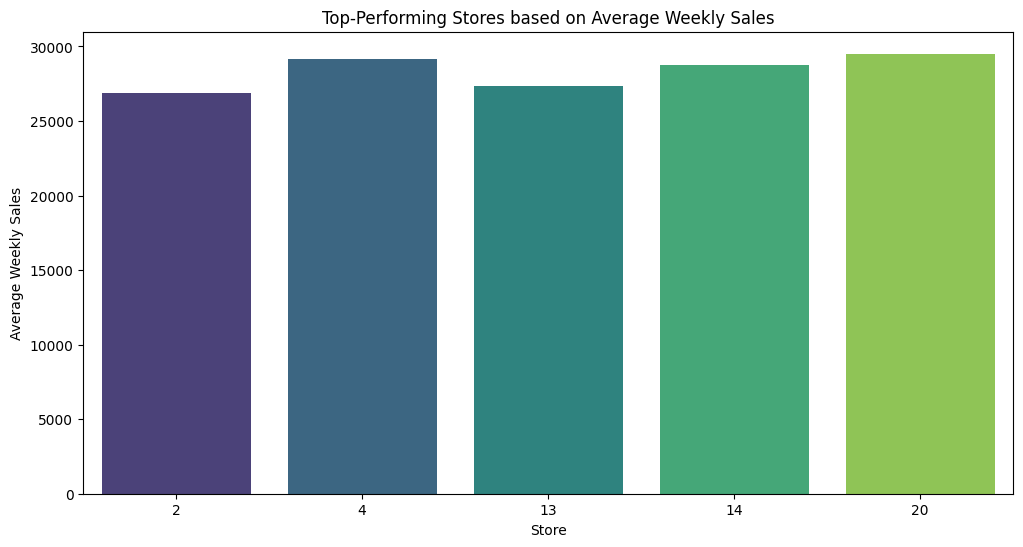

<ipython-input-73-81c9527aa814>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Store', y='Size', data=top_stores_data, palette='Set3')


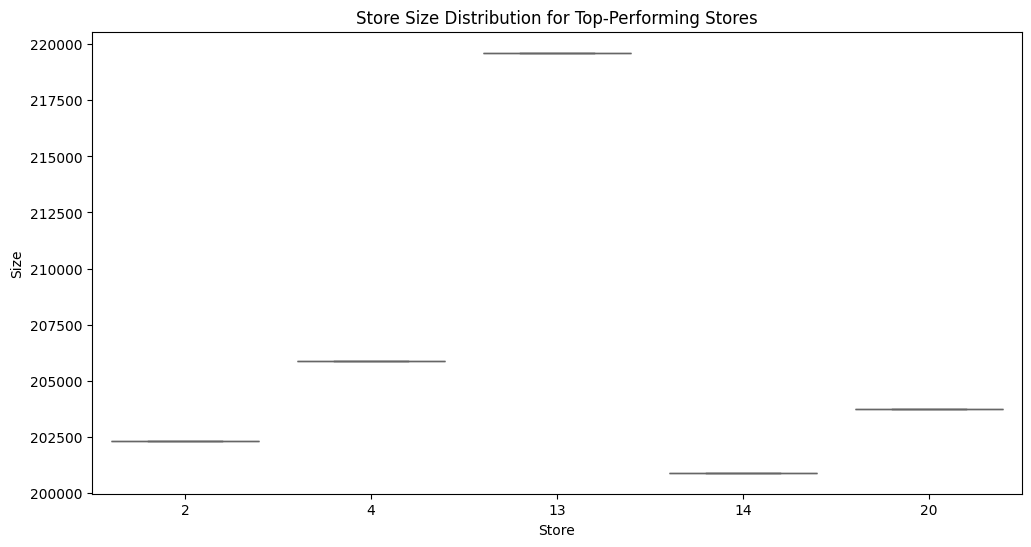

<ipython-input-73-81c9527aa814>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=top_stores_data, palette='pastel')


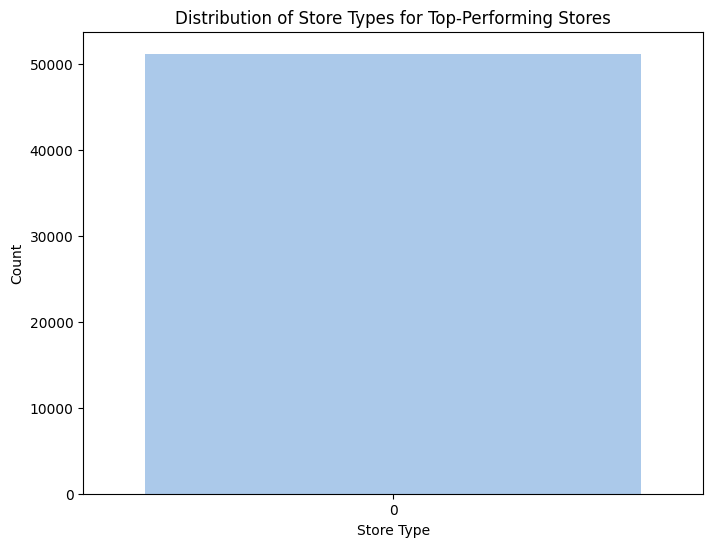

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'merged_data' with 'Store', 'Size', 'Type', 'Weekly_Sales', and other relevant columns

# Identify top-performing stores based on average Weekly Sales
top_stores = merged_data.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False).head(5)

# Plot bar chart for top-performing stores
plt.figure(figsize=(12, 6))
sns.barplot(x=top_stores.index, y=top_stores.values, palette='viridis')
plt.title('Top-Performing Stores based on Average Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.show()

# Explore characteristics of top-performing stores
top_stores_data = merged_data[merged_data['Store'].isin(top_stores.index)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Store', y='Size', data=top_stores_data, palette='Set3')
plt.title('Store Size Distribution for Top-Performing Stores')
plt.xlabel('Store')
plt.ylabel('Size')
plt.show()

# Explore Store Type distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=top_stores_data, palette='pastel')
plt.title('Distribution of Store Types for Top-Performing Stores')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()


In [ ]:
unique_values = merged_data['Temperature'].unique()

print("Unique Values in the Column:")
print(unique_values)

Unique Values in the Column:
[42.31 38.51 39.93 ... 75.87 77.55 74.09]


# Explore Temperature and Weather Impact
# Example: Analyze correlation between temperature/fuel prices and Weekly Sales


In [ ]:
# Assuming you have a DataFrame named 'merged_data'
# Replace 'Temperature' and 'Fuel_Price' with the actual column names you want to analyze

# Correlation with Weekly Sales
temperature_corr = merged_data['Temperature'].corr(merged_data['Weekly_Sales'])
fuel_price_corr = merged_data['Fuel_Price'].corr(merged_data['Weekly_Sales'])

print(f"Correlation between Temperature and Weekly Sales: {temperature_corr}")
print(f"Correlation between Fuel Price and Weekly Sales: {fuel_price_corr}")


Correlation between Temperature and Weekly Sales: -0.002312447010259368
Correlation between Fuel Price and Weekly Sales: -0.00012029554499576824



Correlation is a statistical measure that describes the extent to which two variables change together. It ranges from -1 to 1, where:

1 indicates a perfect positive correlation: as one variable increases, the other also increases proportionally.
-1 indicates a perfect negative correlation: as one variable increases, the other decreases proportionally.
0 indicates no correlation: the variables do not have a linear relationship.
In the statements you provided:

"Correlation between Temperature and Weekly Sales: -0.002312447010259368"

This value is close to zero, indicating a very weak correlation between temperature and weekly sales. The negative sign suggests a slight tendency that as temperature increases, weekly sales might slightly decrease, but the correlation is very weak.
"Correlation between Fuel Price and Weekly Sales: -0.00012029554499576824"

Similarly, this value is very close to zero, suggesting an extremely weak correlation between fuel price and weekly sales. The negative sign implies a very slight tendency that as fuel price increases, weekly sales might slightly decrease, but the correlation is negligible.
In both cases, the correlations are close to zero, indicating that there isn't a strong linear relationship between temperature or fuel price and weekly sales in your dataset. It's important to note that correlation does not imply causation, and other factors may influence the relationship between variables.

In [ ]:
# Calculate correlation between Temperature and Weekly Sales
temperature_corr = merged_data['Temperature'].corr(merged_data['Weekly_Sales'])

# Calculate correlation between Fuel Price and Weekly Sales
fuel_price_corr = merged_data['Fuel_Price'].corr(merged_data['Weekly_Sales'])

# Print the correlation coefficients
print(f"Correlation between Temperature and Weekly Sales: {temperature_corr}")
print(f"Correlation between Fuel Price and Weekly Sales: {fuel_price_corr}")


Correlation between Temperature and Weekly Sales: -0.002312447010259368
Correlation between Fuel Price and Weekly Sales: -0.00012029554499576824


In [ ]:
import statsmodels.api as sm

# Linear regression for Temperature
X_temp = sm.add_constant(merged_data['Temperature'])
model_temp = sm.OLS(merged_data['Weekly_Sales'], X_temp).fit()
print(model_temp.summary())

# Linear regression for Fuel Price
X_fuel_price = sm.add_constant(merged_data['Fuel_Price'])
model_fuel_price = sm.OLS(merged_data['Weekly_Sales'], X_fuel_price).fit()
print(model_fuel_price.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.254
Date:                Mon, 04 Mar 2024   Prob (F-statistic):              0.133
Time:                        12:51:20   Log-Likelihood:            -4.8268e+06
No. Observations:              421570   AIC:                         9.654e+06
Df Residuals:                  421568   BIC:                         9.654e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.615e+04    119.184    135.524      

In [ ]:
from scipy.stats import spearmanr, kendalltau

# Spearman's rank correlation for Temperature
temperature_spearman_corr, _ = spearmanr(merged_data['Temperature'], merged_data['Weekly_Sales'])
print(f"Spearman's rank correlation for Temperature: {temperature_spearman_corr}")

# Kendall's Tau for Fuel Price
fuel_price_kendall_tau, _ = kendalltau(merged_data['Fuel_Price'], merged_data['Weekly_Sales'])
print(f"Kendall's Tau for Fuel Price: {fuel_price_kendall_tau}")


Spearman's rank correlation for Temperature: -0.01975161534039545
Kendall's Tau for Fuel Price: 0.0013885147083406311


Model for fuel price and Tempraure

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# X_temp = merged_data[['Temperature']]
# X_fuel_price = merged_data[['Fuel_Price']]

# model_temp = RandomForestRegressor(n_estimators=100, random_state=42)
# model_temp.fit(X_temp, merged_data['Weekly_Sales'])

# model_fuel_price = RandomForestRegressor(n_estimators=100, random_state=42)
# model_fuel_price.fit(X_fuel_price, merged_data['Weekly_Sales'])


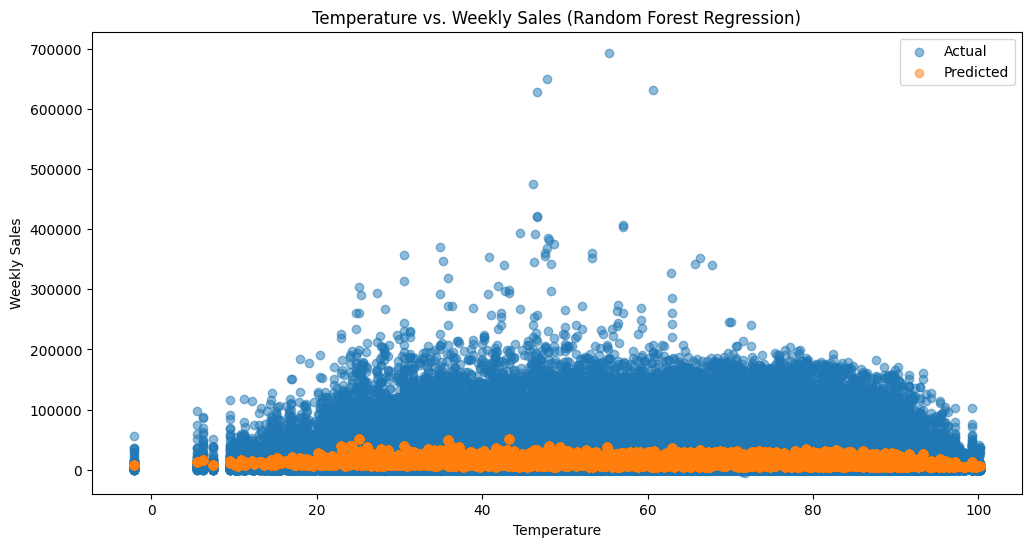

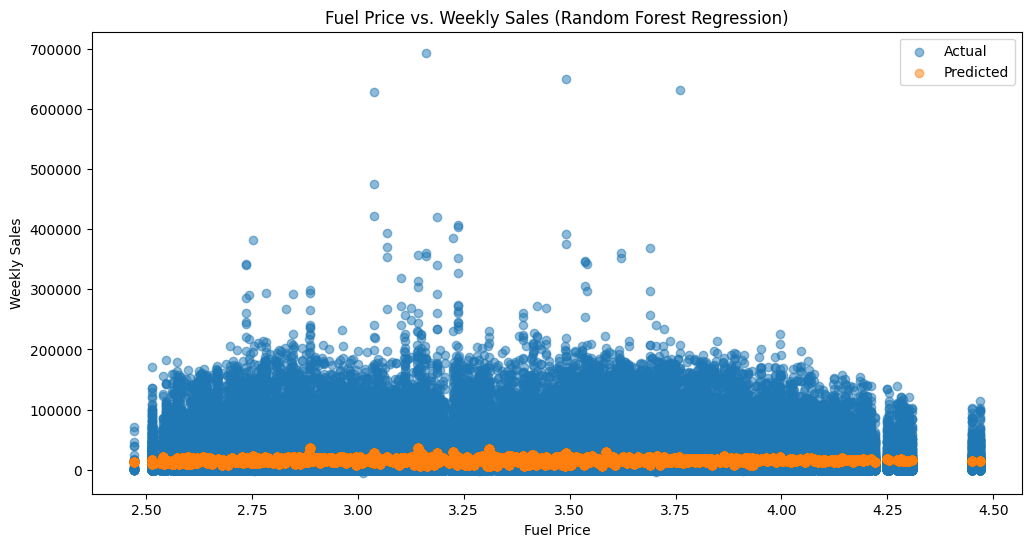

Correlation between Temperature and Predicted Weekly Sales: -0.009525579838286233
Correlation between Fuel Price and Predicted Weekly Sales: 0.0002811777534983402


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Generate predictions
# predictions_temp = model_temp.predict(X_temp)
# predictions_fuel_price = model_fuel_price.predict(X_fuel_price)

# # Plotting Temperature vs. Weekly Sales
# plt.figure(figsize=(12, 6))
# plt.scatter(merged_data['Temperature'], merged_data['Weekly_Sales'], alpha=0.5, label='Actual')
# plt.scatter(merged_data['Temperature'], predictions_temp, alpha=0.5, label='Predicted')
# plt.title('Temperature vs. Weekly Sales (Random Forest Regression)')
# plt.xlabel('Temperature')
# plt.ylabel('Weekly Sales')
# plt.legend()
# plt.show()

# # Plotting Fuel Price vs. Weekly Sales
# plt.figure(figsize=(12, 6))
# plt.scatter(merged_data['Fuel_Price'], merged_data['Weekly_Sales'], alpha=0.5, label='Actual')
# plt.scatter(merged_data['Fuel_Price'], predictions_fuel_price, alpha=0.5, label='Predicted')
# plt.title('Fuel Price vs. Weekly Sales (Random Forest Regression)')
# plt.xlabel('Fuel Price')
# plt.ylabel('Weekly Sales')
# plt.legend()
# plt.show()

# # Numeric Results
# temperature_corr_rf = np.corrcoef(merged_data['Temperature'], predictions_temp)[0, 1]
# fuel_price_corr_rf = np.corrcoef(merged_data['Fuel_Price'], predictions_fuel_price)[0, 1]

# print(f"Correlation between Temperature and Predicted Weekly Sales: {temperature_corr_rf}")
# print(f"Correlation between Fuel Price and Predicted Weekly Sales: {fuel_price_corr_rf}")


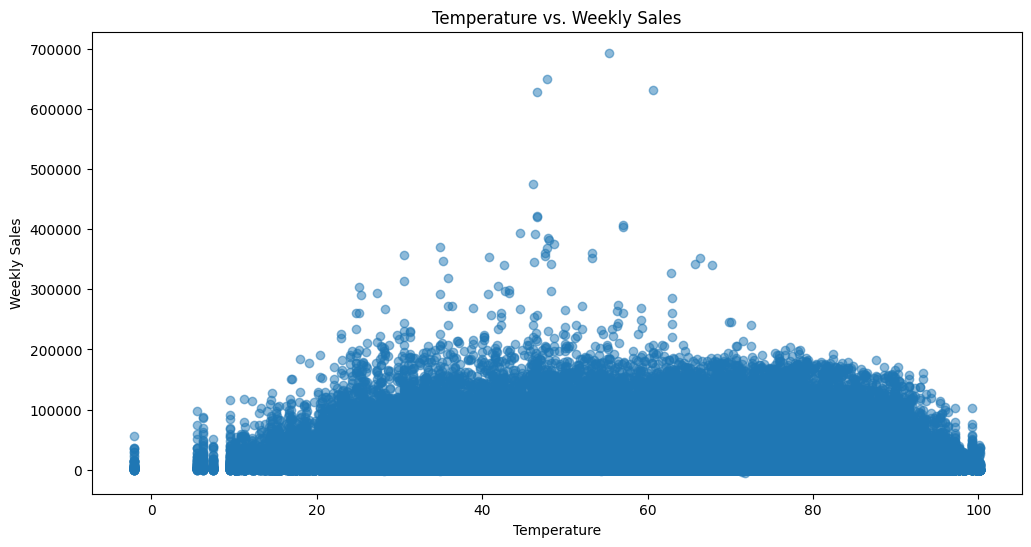

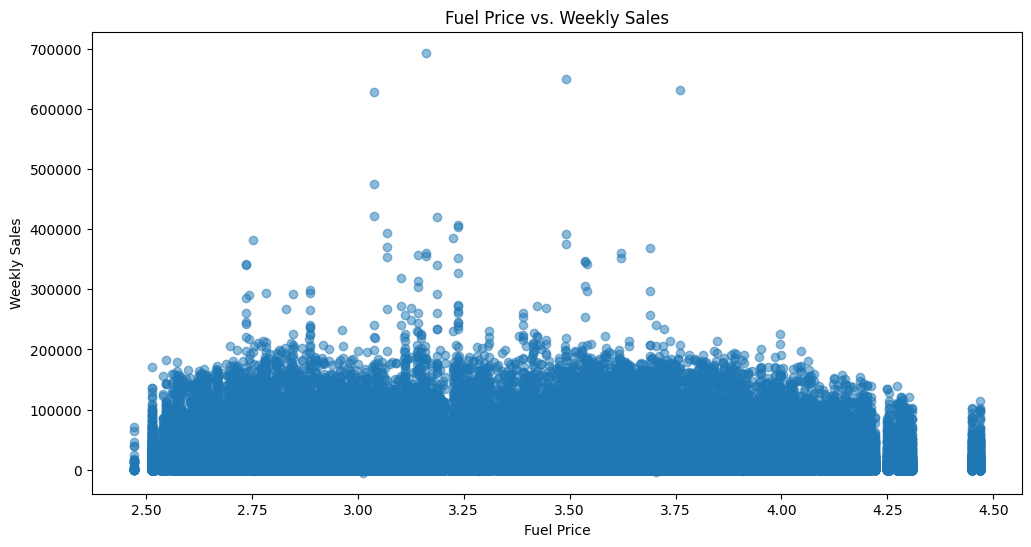

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Temperature vs. Weekly Sales
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['Temperature'], merged_data['Weekly_Sales'], alpha=0.5)
plt.title('Temperature vs. Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

# Scatter plot for Fuel Price vs. Weekly Sales
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['Fuel_Price'], merged_data['Weekly_Sales'], alpha=0.5)
plt.title('Fuel Price vs. Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()


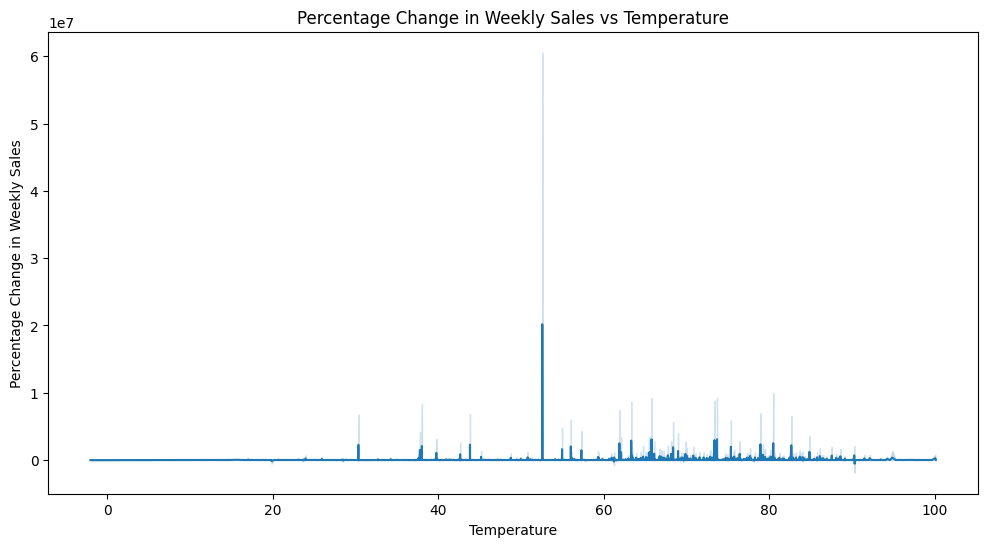

In [ ]:


# Calculate percentage change in Weekly Sales
merged_data['Weekly_Sales_Percentage'] = merged_data['Weekly_Sales'].pct_change() * 100

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Temperature', y='Weekly_Sales_Percentage', data=merged_data)
plt.title('Percentage Change in Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Percentage Change in Weekly Sales')
plt.show()


# Explore Economic Indicators
# Example: Analyze the impact of CPI and Unemployment on Weekly Sales

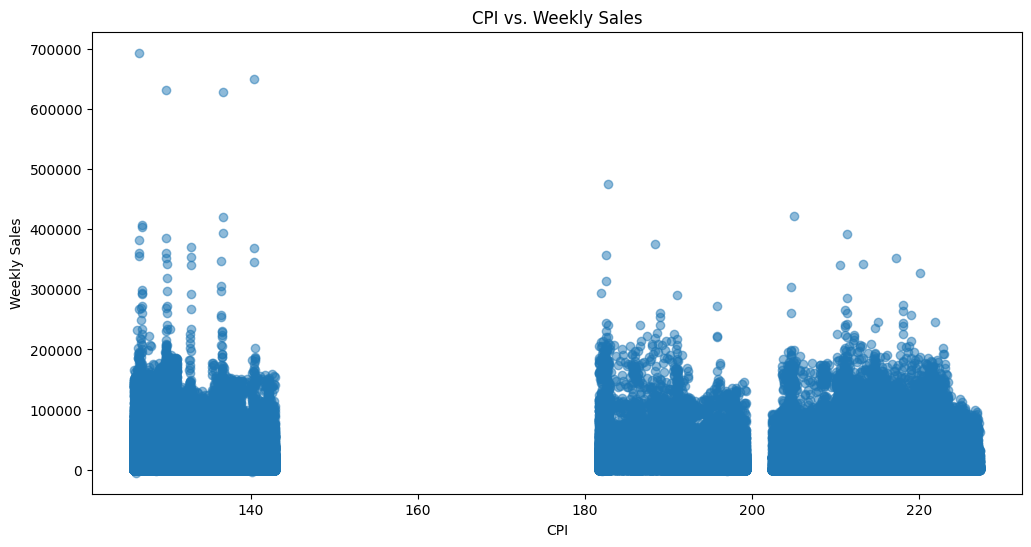

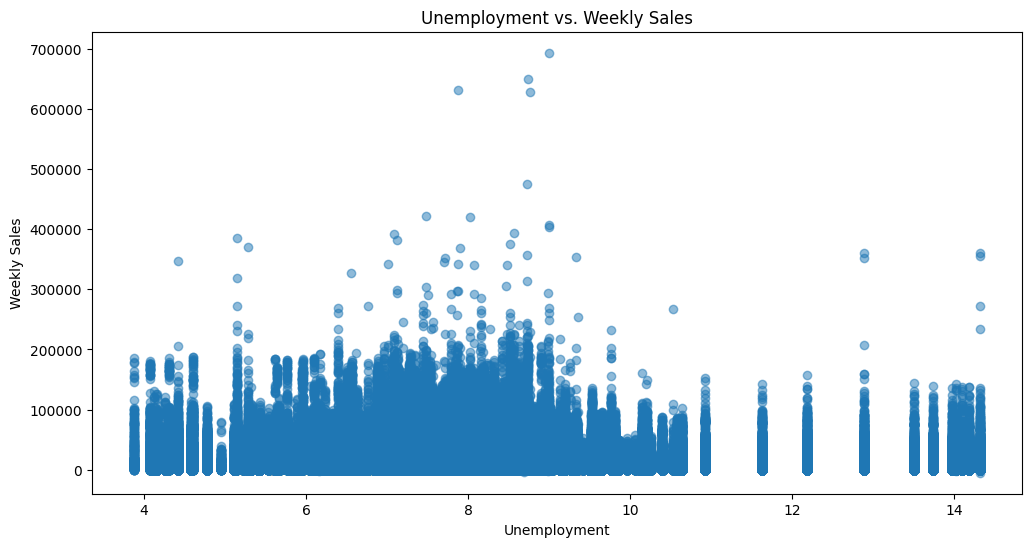

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for CPI vs. Weekly Sales
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['CPI'], merged_data['Weekly_Sales'], alpha=0.5)
plt.title('CPI vs. Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

# Scatter plot for Unemployment vs. Weekly Sales
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['Unemployment'], merged_data['Weekly_Sales'], alpha=0.5)
plt.title('Unemployment vs. Weekly Sales')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()


In [ ]:
correlation_cpi = merged_data['CPI'].corr(merged_data['Weekly_Sales'])
correlation_unemployment = merged_data['Unemployment'].corr(merged_data['Weekly_Sales'])

print(f'Correlation between CPI and Weekly Sales: {correlation_cpi}')
print(f'Correlation between Unemployment and Weekly Sales: {correlation_unemployment}')


Correlation between CPI and Weekly Sales: -0.02092133531881917
Correlation between Unemployment and Weekly Sales: -0.025863716499837645


A negative correlation coefficient indicates an inverse relationship between the variables. In this case, it means that as the values of CPI or Unemployment increase, Weekly Sales tend to decrease, and vice versa.

For example, a negative correlation between CPI and Weekly Sales suggests that higher Consumer Price Index values are associated with lower Weekly Sales. Similarly, a negative correlation between Unemployment and Weekly Sales indicates that higher unemployment rates are associated with lower Weekly Sales.


# Explore Department-Level Analysis
# Example: Identify high-performing and low-performing departments

<ipython-input-40-0339826b0624>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dept', y='Weekly_Sales', data=sorted_depts, palette='viridis')


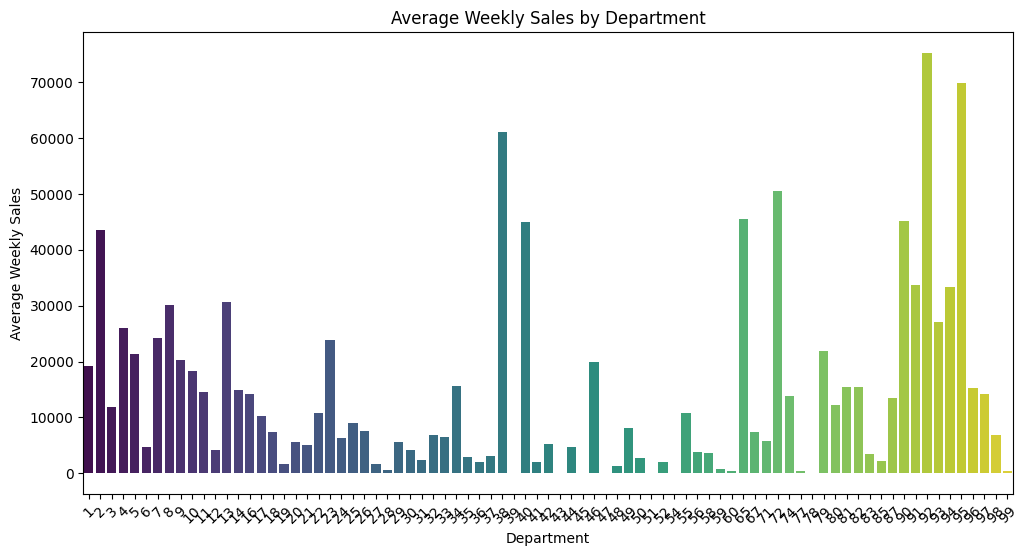

In [ ]:

# Assuming 'merged_data' is your DataFrame
# Calculate average Weekly Sales for each department
dept_sales = merged_data.groupby('Dept')['Weekly_Sales'].mean().reset_index()

# Sort departments by average Weekly Sales
sorted_depts = dept_sales.sort_values(by='Weekly_Sales', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Dept', y='Weekly_Sales', data=sorted_depts, palette='viridis')
plt.title('Average Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)
plt.show()


<ipython-input-41-0a8e730e7663>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dept', y='Weekly_Sales', data=top_depts, palette='viridis')


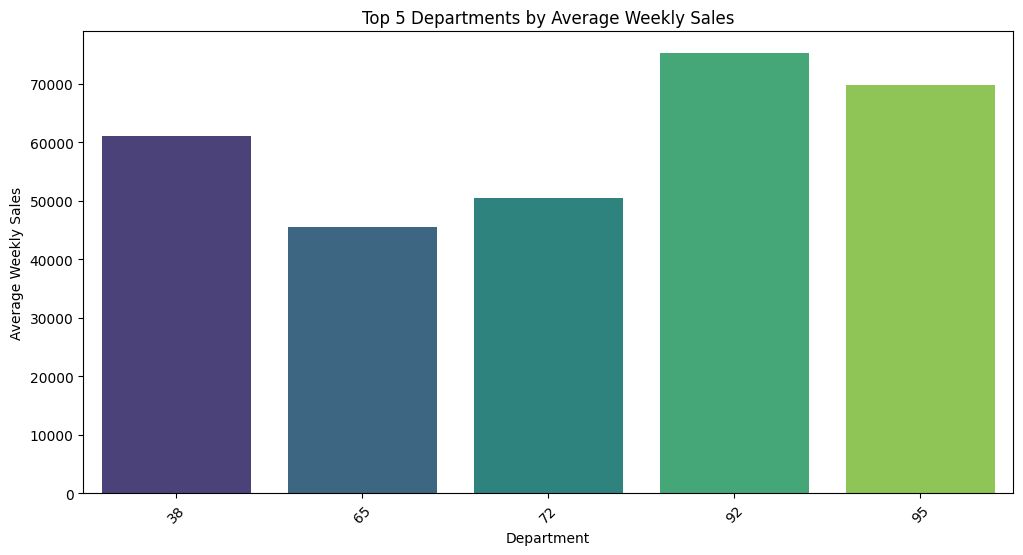

In [ ]:

# Assuming 'merged_data' is your DataFrame
# Calculate average Weekly Sales for each department
dept_sales = merged_data.groupby('Dept')['Weekly_Sales'].mean().reset_index()

# Sort departments by average Weekly Sales
sorted_depts = dept_sales.sort_values(by='Weekly_Sales', ascending=False)

# Select the top N departments (e.g., top 5)
top_depts = sorted_depts.head(5)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Dept', y='Weekly_Sales', data=top_depts, palette='viridis')
plt.title('Top 5 Departments by Average Weekly Sales')
plt.xlabel('Department')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)
plt.show()


# Explore Type and Size Analysis
# Example: Analyze the impact of store types and sizes on Weekly Sales

<ipython-input-42-bd0e55ce223b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Weekly_Sales', data=merged_data, palette='muted')


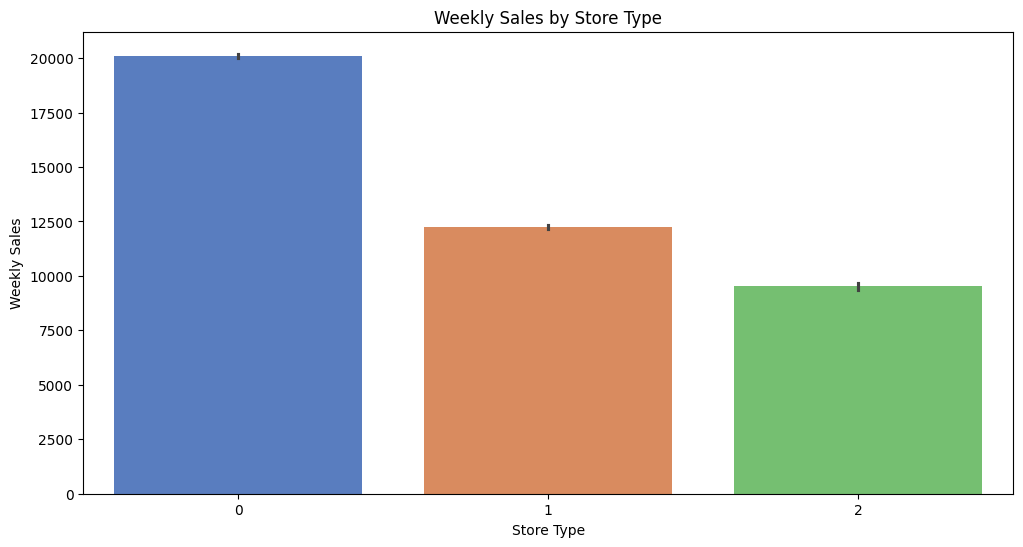

<ipython-input-42-bd0e55ce223b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Size', y='Weekly_Sales', data=merged_data, palette='pastel')


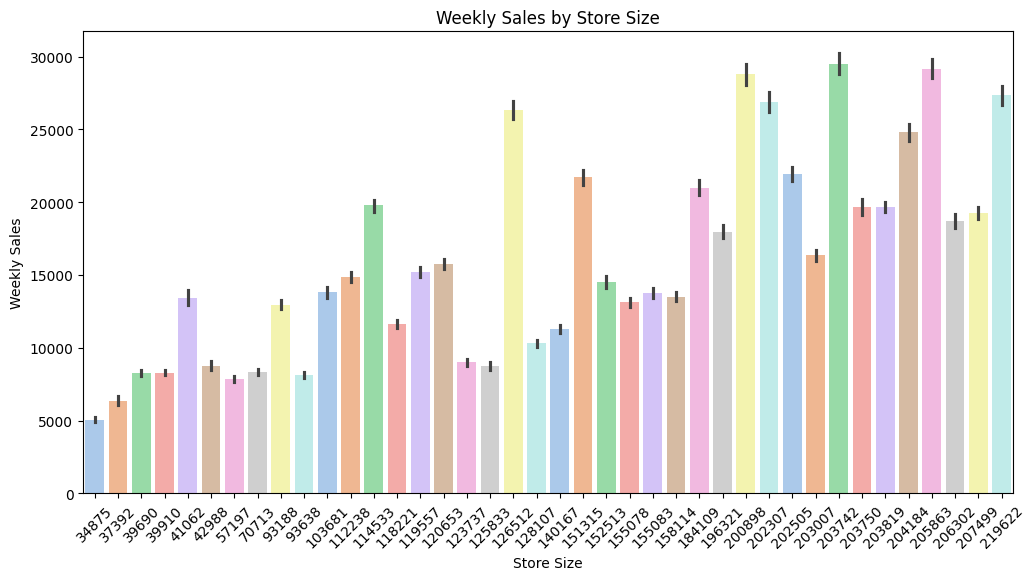

In [ ]:
# Assuming 'merged_data' is your DataFrame
# Plotting for Store Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Type', y='Weekly_Sales', data=merged_data, palette='muted')
plt.title('Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.show()

# Plotting for Store Size
plt.figure(figsize=(12, 6))
sns.barplot(x='Size', y='Weekly_Sales', data=merged_data, palette='pastel')
plt.title('Weekly Sales by Store Size')
plt.xlabel('Store Size')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.show()

<ipython-input-43-43c651944760>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_store_sizes.index, y=top_5_store_sizes.values, palette='viridis')


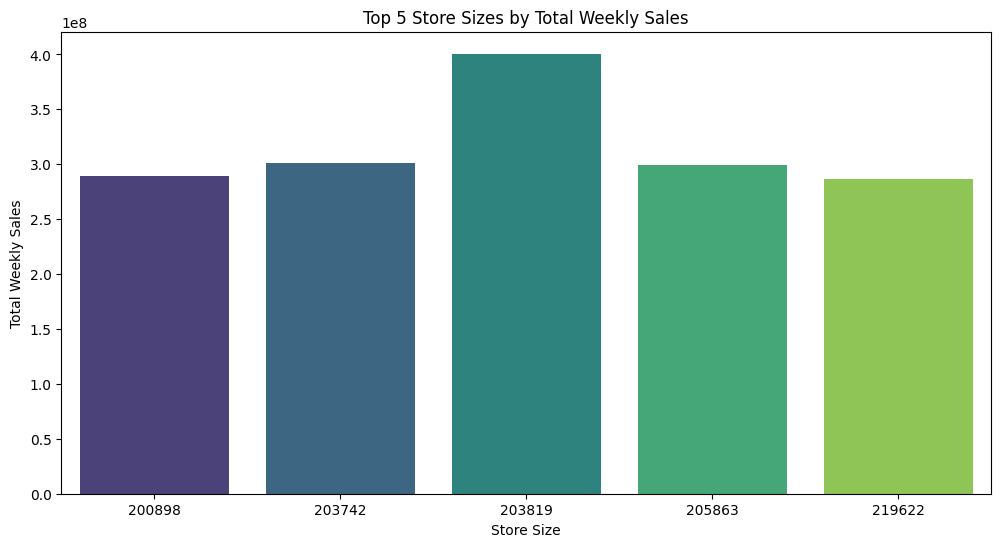

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_data' is your DataFrame
# Aggregate Weekly Sales by Store Size
store_size_sales = merged_data.groupby('Size')['Weekly_Sales'].sum().sort_values(ascending=False)

# Select top 5 store sizes
top_5_store_sizes = store_size_sales.head(5)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_store_sizes.index, y=top_5_store_sizes.values, palette='viridis')
plt.title('Top 5 Store Sizes by Total Weekly Sales')
plt.xlabel('Store Size')
plt.ylabel('Total Weekly Sales')
plt.show()


In [ ]:
correlation_size_sales = merged_data['Size'].corr(merged_data['Weekly_Sales'])
print(f'Correlation between Size and Weekly Sales: {correlation_size_sales}')


Correlation between Size and Weekly Sales: 0.2438279922630429


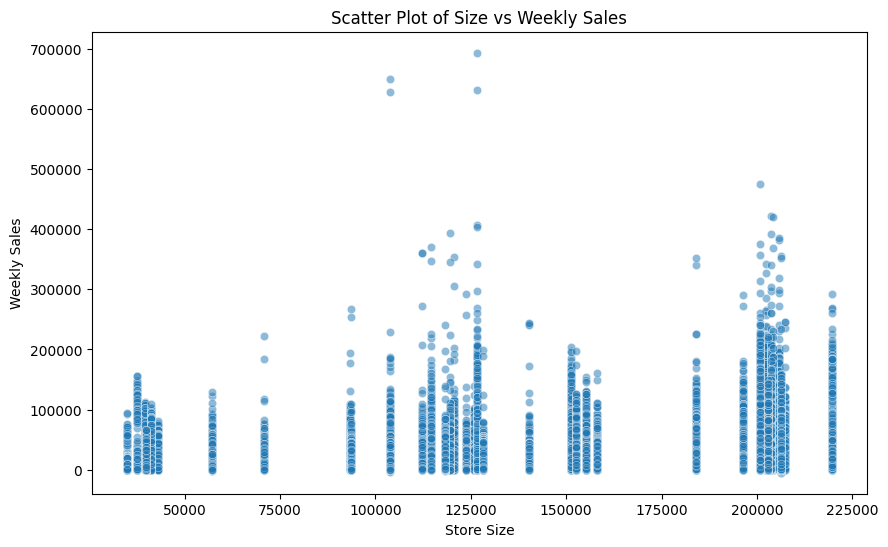

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Weekly_Sales', data=merged_data, alpha=0.5)
plt.title('Scatter Plot of Size vs Weekly Sales')
plt.xlabel('Store Size')
plt.ylabel('Weekly Sales')
plt.show()

# Explore Time Series Analysis
# Example: Visualize time series plots to identify trends and patterns

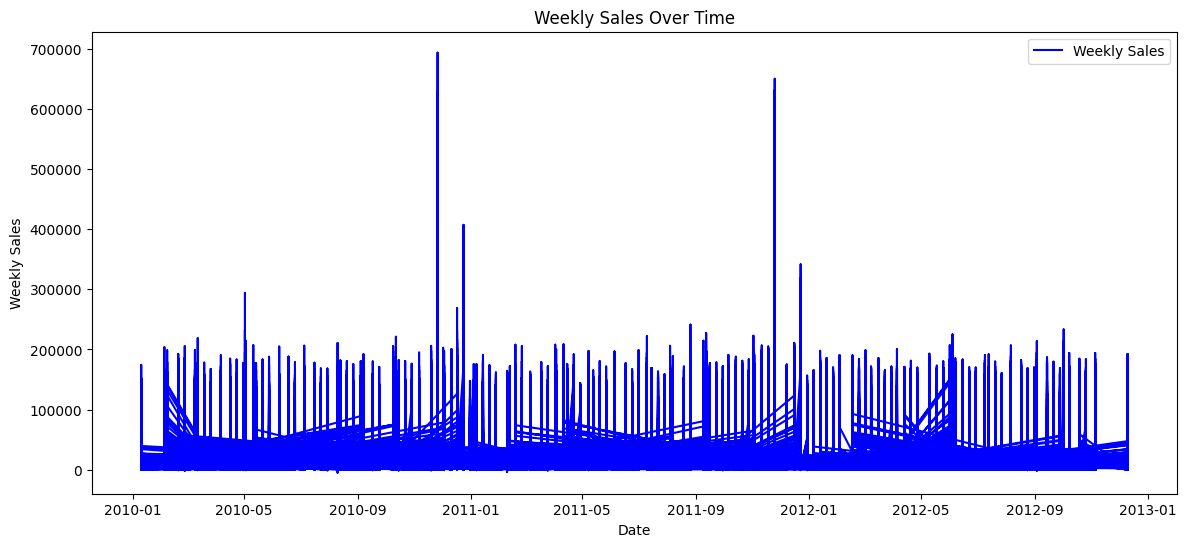

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'merged_data' is your DataFrame with 'Date' and 'Weekly_Sales' columns
merged_data['Date'] = pd.to_datetime(merged_data['Date'])  # Convert 'Date' to datetime type if not already

# Plotting the time series
plt.figure(figsize=(14, 6))
plt.plot(merged_data['Date'], merged_data['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()



# Additional actions and visualizations based on specific insights

**1. Seasonal Decomposition:**

<Figure size 1200x800 with 0 Axes>

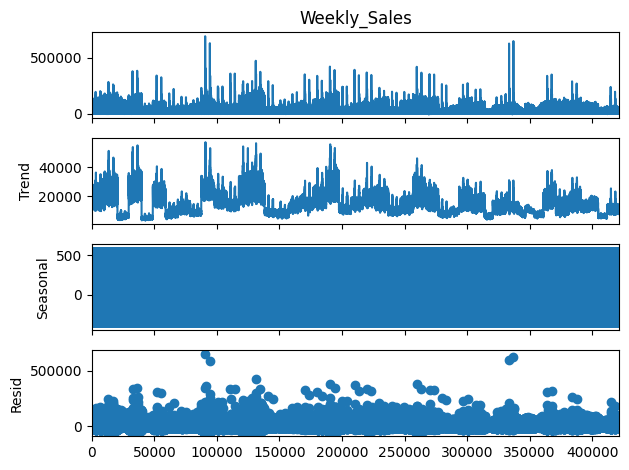

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'merged_data' has a DateTime index
result = seasonal_decompose(merged_data['Weekly_Sales'], model='additive', period=52)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
result.plot()
plt.show()


**2. Rolling Statistics:**

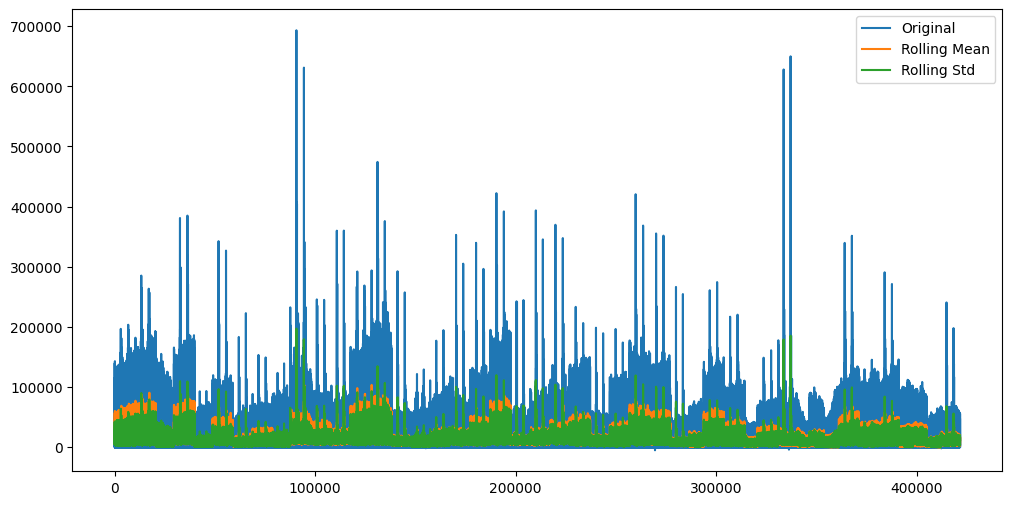

In [ ]:
# Calculate rolling mean and rolling standard deviation
rolling_mean = merged_data['Weekly_Sales'].rolling(window=12).mean()
rolling_std = merged_data['Weekly_Sales'].rolling(window=12).std()

# Plot original time series and rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Weekly_Sales'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.show()


**3. Holiday Impact:**

In [ ]:
print(holidays.columns)


Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday_x', 'Type', 'Size', 'Dept', 'Weekly_Sales', 'IsHoliday_y',
       'Year', 'Month', 'Year_Month'],
      dtype='object')


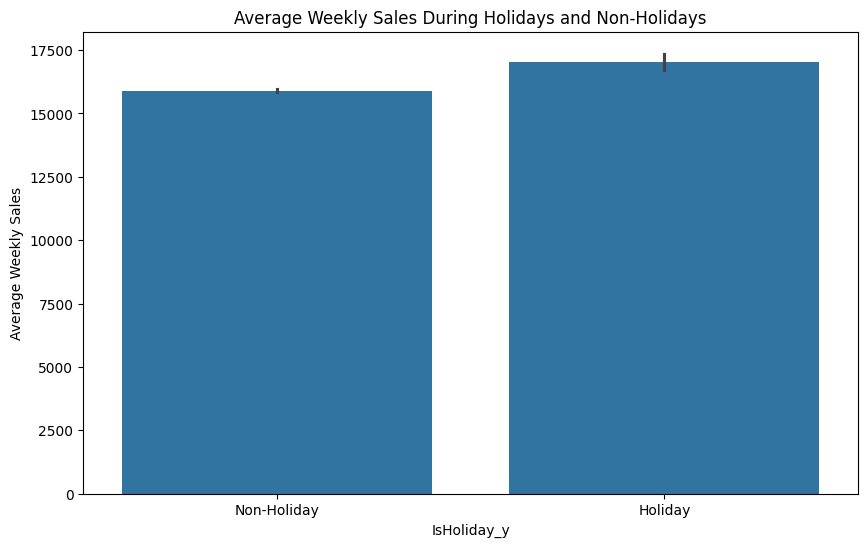

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for average weekly sales during holidays and non-holidays
plt.figure(figsize=(10, 6))
sns.barplot(x='IsHoliday_y', y='Weekly_Sales', data=merged_data)
plt.title('Average Weekly Sales During Holidays and Non-Holidays')
plt.xlabel('IsHoliday_y')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()


the count in this context represents the number of occurrences of each category (holiday or non-holiday) in the 'IsHoliday_x' column, and the bar plot visually depicts this distribution.

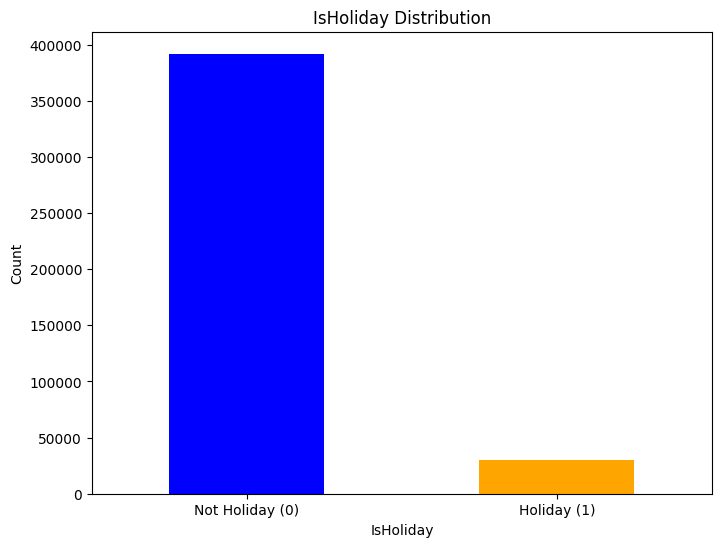

In [ ]:
# Assuming 'sales' is your DataFrame
merged_data['IsHoliday_x'] = merged_data['IsHoliday_x'].astype(int)

# Plotting
plt.figure(figsize=(8, 6))
merged_data['IsHoliday_x'].value_counts().sort_index().plot(kind='bar', color=['blue', 'orange'])
plt.title('IsHoliday Distribution')
plt.xlabel('IsHoliday')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Holiday (0)', 'Holiday (1)'], rotation=0)
plt.show()

Predict the department-wise sales for each store for the following



year


In [ ]:
merged_data.head(6)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,IsHoliday_x,Type,Size,Dept,Weekly_Sales,IsHoliday_y,Year,Month,Year_Month,Weekly_Sales_Percentage
0,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,0,0,151315,1,24924.50,0,2010,5,2010_5,NaN
1,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,0,0,151315,2,50605.27,0,2010,5,2010_5,103.034243
2,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,0,0,151315,3,13740.12,0,2010,5,2010_5,-72.848440
3,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,0,0,151315,4,39954.04,0,2010,5,2010_5,190.783778
4,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,0,0,151315,5,32229.38,0,2010,5,2010_5,-19.333865
5,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,0,0,151315,6,5749.03,0,2010,5,2010_5,-82.162145


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

import numpy as np
import pandas as pd

# Assuming 'merged_data' is your DataFrame
# Assuming 'X' is your feature matrix and 'y' is department-wise sales
X = merged_data.drop(['Weekly_Sales'], axis=1)
y = merged_data['Weekly_Sales']

# Convert datetime column to numeric representation
X['Date'] = pd.to_datetime(X['Date']).astype(np.int64) // 10**9  # Convert datetime to Unix timestamp

# Handling outliers by capping extreme values
quantile_cols = ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
X_capped = X.copy()
X_capped[quantile_cols] = X_capped[quantile_cols].clip(lower=X_capped[quantile_cols].quantile(0.05), upper=X_capped[quantile_cols].quantile(0.95), axis=1)

# Check and handle infinite values
X_capped.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X_capped), columns=X.columns)

# Loop through each department and store combination
for department in merged_data['Dept'].unique():
    for store in merged_data['Store'].unique():
        # Filter data for the specific department and store
        mask = (merged_data['Dept'] == department) & (merged_data['Store'] == store)
        X_dept_store = X_imputed[mask]
        y_dept_store = y[mask]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_dept_store, y_dept_store, test_size=0.2, random_state=42)

        # Initialize the model
        model = RandomForestRegressor(n_estimators=100, random_state=42)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions for the following year
        # You need to have features for the following year in X_following_year
        # For example, create a DataFrame with the relevant features for each store
        X_following_year = input()

        # Make predictions
        predictions_next_year = model.predict(X_following_year)

        # Evaluate the model
        mae_next_year = mean_absolute_error(y_true_for_next_year, predictions_next_year)
        print(f'Mean Absolute Error for Next Year (Dept {department}, Store {store}): {mae_next_year}')


2019


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=2019.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
import pandas as pd
import numpy as np

# Example: Creating 'X_following_year' DataFrame
data_following_year = {
    'Store': [1, 2, 3],  # Add your store IDs
    'Temperature': [25.0, 28.0, 23.5],  # Add temperature values for each store
    'Fuel_Price': [2.5, 2.7, 2.3],  # Add fuel price values for each store
    'MarkDown1': [5000, 3000, 2000],  # Add MarkDown1 values for each store
    'MarkDown2': [1000, 800, 1200],  # Add MarkDown2 values for each store
    'MarkDown3': [300, 200, 150],  # Add MarkDown3 values for each store
    'MarkDown4': [400, 250, 180],  # Add MarkDown4 values for each store
    'MarkDown5': [600, 350, 220],  # Add MarkDown5 values for each store
    'CPI': [200, 195, 205],  # Add CPI values for each store
    'Unemployment': [5.0, 6.0, 4.5],  # Add Unemployment values for each store
    'IsHoliday_x': [False, True, False],  # Add IsHoliday_x values for each store
    'Type': ['A', 'B', 'C'],  # Add store types
    'Size': [50000, 60000, 45000],  # Add store sizes
    'Dept': [1, 2, 3],  # Add department values for each store
}

# Create DataFrame
X_following_year = pd.DataFrame(data_following_year)

# Display DataFrame
print(X_following_year)


   Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0      1         25.0         2.5       5000       1000        300        400   
1      2         28.0         2.7       3000        800        200        250   
2      3         23.5         2.3       2000       1200        150        180   

   MarkDown5  CPI  Unemployment  IsHoliday_x Type   Size  Dept  
0        600  200           5.0        False    A  50000     1  
1        350  195           6.0         True    B  60000     2  
2        220  205           4.5        False    C  45000     3  
